In [299]:
import csv # read and write csv files
import pandas as pd

In [300]:
def data_load(filename):
    path = 'data/'+filename
    with open(filename, 'r') as f_in:

        oly_data = pd.read_csv(f_in)
        header = oly_data.iloc[0]
        oly_data = oly_data[1:]
        oly_data.columns = header
        oly_data.columns.values[0] = 'Country'
        col = []
        count = 0
        flag = False
        print(oly_data.columns)
        oly_data = oly_data.rename(columns={'Country':'Country', '01 !': 'Gold', '02 !': 'Silver', '03 !' : 'Bronze'})
#         for a in oly_data.columns:
#             title = a
#             if '#' in a:
#                 title = a.split(' ')[1]
#                 temp = title
#                 flag = True
#                 col.append(title)
#                 continue
#             if flag:
#                 title = temp + " " +a
#                 count += 1
#                 if count == 3:
#                     count = 0
#                     flag = False
#             col.append(title)
#         print(col)
#         oly_data =  oly_data.rename(columns=lambda col: col)
        oly_data = oly_data.set_index('Country')
        oly_data.drop('Total', axis=1, inplace=True)
        oly_data.drop('Combined total', axis=1, inplace=True)
        oly_data.drop('Totals', axis=0, inplace=True)
    index = []
    for a in oly_data.index:
        try:
            name, code = a.split('(')
            oly_data =  oly_data.rename({a: name.strip(" ")})
            index.append(name)
        except  ValueError:
            pass
    print(oly_data.head())
    return oly_data


data_file = 'data/olympics.csv'

oly_data = data_load(data_file)




Index(['Country', '# Summer', '01 !', '02 !', '03 !', 'Total', '# Winter',
       '01 !', '02 !', '03 !', 'Total', '# Games', '01 !', '02 !', '03 !',
       'Combined total'],
      dtype='object', name=0)
0           # Summer Gold Silver Bronze # Winter Gold Silver Bronze # Games  \
Country                                                                       
Afghanistan       13    0      0      2        0    0      0      0      13   
Algeria           12    5      2      8        3    0      0      0      15   
Argentina         23   18     24     28       18    0      0      0      41   
Armenia            5    1      2      9        6    0      0      0      11   
Australasia        2    3      4      5        0    0      0      0       2   

0           Gold Silver Bronze  
Country                         
Afghanistan    0      0      2  
Algeria        5      2      8  
Argentina     18     24     28  
Armenia        1      2      9  
Australasia    3      4      5  


In [301]:
def first_country(oly_df):
    print(oly_df[0:1])
    return (oly_df[0:1])

In [302]:
f_country = first_country(oly_data)
a = oly_data.loc['Algeria']['Gold'].tolist()
print(a[2])

0           # Summer Gold Silver Bronze # Winter Gold Silver Bronze # Games  \
Country                                                                       
Afghanistan       13    0      0      2        0    0      0      0      13   

0           Gold Silver Bronze  
Country                         
Afghanistan    0      0      2  
5


In [303]:
def gold_medal(oly_df):
    temp = 0
    for _, each_country in oly_df.iterrows():
#         print(each_country['Gold'].tolist()[0])
        if temp < int(each_country['Gold'].tolist()[0]):
            temp = int(each_country['Gold'].tolist()[0])
            name = _
    return (name)

In [304]:
max_summmer_g_medals = gold_medal(oly_data)
print(max_summmer_g_medals)


United States


In [305]:
def biggest_difference_in_gold_medal (oly_df):
    temp = 0
    for _, each_country in oly_df.iterrows():
        
#         print(each_country['Gold'].tolist()[0])
        diff = abs(int(each_country['Gold'].tolist()[0]) - int(each_country['Gold'].tolist()[1]))
        if temp < diff:
            temp = diff
            name = _
    print(name)

In [306]:
biggest_difference_in_gold_medal(oly_data)

United States


In [307]:
def get_points(oly_df):
    points = []
    for _, each_country in oly_df.iterrows():
        temp = 0
        temp = temp + int(each_country['Gold'].tolist()[2]) * 3
        temp = temp + int(each_country['Silver'].tolist()[2]) * 2
        temp = temp + int(each_country['Bronze'].tolist()[2]) * 1
        points.append(temp)
    oly_df['Points'] = points
    return oly_df
        

In [308]:
oly_data = get_points(oly_data)
print(oly_data.head())

0           # Summer Gold Silver Bronze # Winter Gold Silver Bronze # Games  \
Country                                                                       
Afghanistan       13    0      0      2        0    0      0      0      13   
Algeria           12    5      2      8        3    0      0      0      15   
Argentina         23   18     24     28       18    0      0      0      41   
Armenia            5    1      2      9        6    0      0      0      11   
Australasia        2    3      4      5        0    0      0      0       2   

0           Gold Silver Bronze  Points  
Country                                 
Afghanistan    0      0      2       2  
Algeria        5      2      8      27  
Argentina     18     24     28     130  
Armenia        1      2      9      16  
Australasia    3      4      5      22  


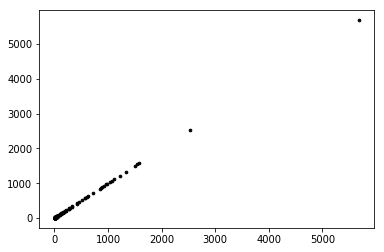

In [316]:
# for i, row in df.iterrows():
#   ifor_val = something
#   if <condition>:
#     ifor_val = something_else
#   df.set_value(i,'ifor',ifor_val)
for i, each_country in oly_data.iterrows():
#     print(oly_data.loc[i])
    temp = []
    for a in each_country:
        temp.append(int(a))
    oly_data.loc[i] = temp
#     ifor_val = something
    

from matplotlib import pyplot as plt
%matplotlib inline
f2 = oly_data['Points'].values
f1 = oly_data['Points'].values
plt.scatter(f1, f2, c='black', s=7)